# Lecture 0 - Introduction to QuTiP - The Quantum Toolbox in Python

Author: J. R. Johansson (robert@riken.jp), http://dml.riken.jp/~rob/

The latest version of this [IPython notebook](http://ipython.org/ipython-doc/dev/interactive/htmlnotebook.html) lecture is available at [http://github.com/jrjohansson/qutip-lectures](http://github.com/jrjohansson/qutip-lectures).

The other notebooks in this lecture series are indexed at [http://jrjohansson.github.com](http://jrjohansson.github.com).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

## Introduction

QuTiP is a python package for calculations and numerical simulations of quantum systems. 

It includes facilities for representing and doing calculations with quantum objects such state vectors (wavefunctions), as bras/kets/density matrices, quantum operators of single and composite systems, and superoperators (useful for defining master equations).

It also includes solvers for a time-evolution of quantum systems, according to: Schrodinger equation, von Neuman equation, master equations, Floquet formalism, Monte-Carlo quantum trajectors, experimental implementations of the stochastic Schrodinger/master equations.

For more information see the project web site at http://qutip.googlecode.com, and the documentation at http://qutip.googlecode.com/svn/doc/2.1.0/html/index.html.

### Installation

To install QuTiP, download the latest release from http://code.google.com/p/qutip/downloads/list or get the latest code from https://github.com/qutip/qutip, and run

    $ sudo python setup.py install

in the source code directory. For more detailed installation instructions and a list of dependencies that must be installed on the system (basically python+cython+numpy+scipy+matplotlib), see http://qutip.googlecode.com/svn/doc/2.1.0/html/installation.html.

To use QuTiP in a Python program, first inlude the `qutip` module:

In [2]:
from qutip import *

This will make the functions and classes in QuTiP available in the rest of the program.

## Quantum object class: `qobj`

At the heart of the QuTiP package is the `Qobj` class, which is used for representing quantum object such as states and operator. 

The `Qobj` class contains all the information required to describe a quantum system, such as its matrix representation, composite structure and dimensionality. 

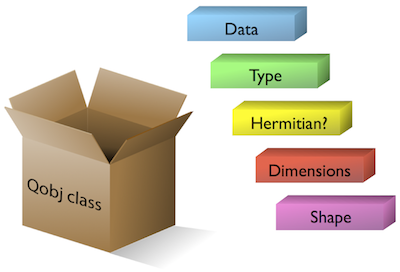

In [3]:
Image(filename='images/qobj.png')

### Creating and inspecting quantum objects

We can create a new quantum object using the `Qobj` class constructor, like this:

In [4]:
q = Qobj([[1], [0]])

q

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

Here we passed python list as an argument to the class constructor. The data in this list is used to construct the matrix representation of the quantum objects, and the other properties of the quantum object is by default computed from the same data.

We can inspect the properties of a `Qobj` instance using the following class method:

In [5]:
# the dimension, or composite Hilbert state space structure
q.dims

[[2], [1]]

In [6]:
# the shape of the matrix data representation
q.shape

(2, 1)

In [7]:
# the matrix data itself. in sparse matrix format. 
q.data

<2x1 sparse matrix of type '<class 'numpy.complex128'>'
	with 1 stored elements in Compressed Sparse Row format>

In [8]:
# get the dense matrix representation
q.full()

array([[1.+0.j],
       [0.+0.j]])

In [9]:
# some additional properties
q.isherm, q.type 

(False, 'ket')

### Using `Qobj` instances for calculations

With `Qobj` instances we can do arithmetic and apply a number of different operations using class methods:

In [10]:
sy = Qobj([[0,-1j], [1j,0]])  # the sigma-y Pauli operator

sy

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]

In [11]:
sz = Qobj([[1,0], [0,-1]]) # the sigma-z Pauli operator

sz

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

In [12]:
# some arithmetic with quantum objects

H = 1.0 * sz + 0.1 * sy

print("Qubit Hamiltonian = \n")
H

Qubit Hamiltonian = 



Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.+0.j   0.-0.1j]
 [ 0.+0.1j -1.+0.j ]]

Example of modifying quantum objects using the `Qobj` methods:

In [13]:
# The hermitian conjugate
sy.dag()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]

In [14]:
# The trace
H.tr()

0.0

In [15]:
# Eigen energies
H.eigenenergies()

array([-1.00498756,  1.00498756])

For a complete list of methods and properties of the `Qobj` class, see the [QuTiP documentation](http://qutip.googlecode.com/svn/doc/2.1.0/html/index.html) or try `help(Qobj)` or `dir(Qobj)`.

## States and operators

Normally we do not need to create `Qobj` instances from stratch, using its constructor and passing its matrix represantation as argument. Instead we can use functions in QuTiP that generates common states and operators for us. Here are some examples of built-in state functions:

### State vectors

In [16]:
# Fundamental basis states (Fock states of oscillator modes)

N = 2 # number of states in the Hilbert space
n = 1 # the state that will be occupied

basis(N, n)    # equivalent to fock(N, n)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]

In [17]:
fock(4, 2) # another example

Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]]

In [18]:
# a coherent state
coherent(N=10, alpha=1.0)

Quantum object: dims = [[10], [1]], shape = (10, 1), type = ket
Qobj data =
[[0.60653066]
 [0.60653066]
 [0.42888194]
 [0.24761511]
 [0.12380753]
 [0.0553686 ]
 [0.02260303]
 [0.00854887]
 [0.00299672]
 [0.00110007]]

### Density matrices

In [19]:
# a fock state as density matrix
fock_dm(5, 2) # 5 = hilbert space size, 2 = state that is occupied

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

In [20]:
# coherent state as density matrix
coherent_dm(N=8, alpha=1.0)

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[3.67879439e-01 3.67879455e-01 2.60129900e-01 1.50187300e-01
  7.50858773e-02 3.36199110e-02 1.35485515e-02 5.77267786e-03]
 [3.67879455e-01 3.67879470e-01 2.60129911e-01 1.50187306e-01
  7.50858804e-02 3.36199124e-02 1.35485520e-02 5.77267810e-03]
 [2.60129900e-01 2.60129911e-01 1.83939513e-01 1.06198399e-01
  5.30937031e-02 2.37728537e-02 9.58026722e-03 4.08189737e-03]
 [1.50187300e-01 1.50187306e-01 1.06198399e-01 6.13141770e-02
  3.06539153e-02 1.37253761e-02 5.53121524e-03 2.35670388e-03]
 [7.50858773e-02 7.50858804e-02 5.30937031e-02 3.06539153e-02
  1.53253712e-02 6.86197771e-03 2.76532136e-03 1.17822997e-03]
 [3.36199110e-02 3.36199124e-02 2.37728537e-02 1.37253761e-02
  6.86197771e-03 3.07246966e-03 1.23818035e-03 5.27555757e-04]
 [1.35485515e-02 1.35485520e-02 9.58026722e-03 5.53121524e-03
  2.76532136e-03 1.23818035e-03 4.98976640e-04 2.12600691e-04]
 [5.77267786e-03 5.77267810e-03 4.0

In [21]:
# thermal state
n = 1 # average number of thermal photons
thermal_dm(8, n)

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0.50196078 0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.25098039 0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.1254902  0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.0627451  0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.03137255 0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.01568627
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.00784314 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.00392157]]

### Operators

#### Qubit (two-level system) operators

In [22]:
# Pauli sigma x
sigmax()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

In [23]:
# Pauli sigma y
sigmay()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]

In [24]:
# Pauli sigma z
sigmaz()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

#### Harmonic oscillator operators

In [25]:
#  annihilation operator

destroy(N=8) # N = number of fock states included in the Hilbert space

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[0.         1.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         1.41421356 0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         1.73205081 0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         2.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         2.23606798
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  2.44948974 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         2.64575131]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]]

In [26]:
# creation operator

create(N=8) # equivalent to destroy(5).dag()

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [1.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         1.41421356 0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         1.73205081 0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         2.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         2.23606798 0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         2.44948974
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  2.64575131 0.        ]]

In [27]:
# the position operator is easily constructed from the annihilation operator
a = destroy(8)

x = a + a.dag()

x

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0.         1.         0.         0.         0.         0.
  0.         0.        ]
 [1.         0.         1.41421356 0.         0.         0.
  0.         0.        ]
 [0.         1.41421356 0.         1.73205081 0.         0.
  0.         0.        ]
 [0.         0.         1.73205081 0.         2.         0.
  0.         0.        ]
 [0.         0.         0.         2.         0.         2.23606798
  0.         0.        ]
 [0.         0.         0.         0.         2.23606798 0.
  2.44948974 0.        ]
 [0.         0.         0.         0.         0.         2.44948974
  0.         2.64575131]
 [0.         0.         0.         0.         0.         0.
  2.64575131 0.        ]]

#### Using `Qobj` instances we can check some well known commutation relations:

In [28]:
def commutator(op1, op2):
    return op1 * op2 - op2 * op1

$[a, a^1] = 1$

In [29]:
a = destroy(5)

commutator(a, a.dag())

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0. -4.]]

**Ops...** The result is not identity! Why? Because we have truncated the Hilbert space. But that's OK as long as the highest Fock state isn't involved in the dynamics in our truncated Hilbert space. If it is, the approximation that the truncation introduces might be a problem.

$[x,p] = i$

In [31]:
x =       (a + a.dag())/np.sqrt(2)
p = -1j * (a - a.dag())/np.sqrt(2)

In [32]:
commutator(x, p)

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = False
Qobj data =
[[0.+1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+1.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+1.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+1.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.-4.j]]

Same issue with the truncated Hilbert space, but otherwise OK.

Let's try some Pauli spin inequalities

$[\sigma_x, \sigma_y] = 2i \sigma_z$

In [33]:
commutator(sigmax(), sigmay()) - 2j * sigmaz()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 0.]
 [0. 0.]]

$-i \sigma_x \sigma_y \sigma_z = \mathbf{1}$

In [34]:
-1j * sigmax() * sigmay() * sigmaz()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 1.]]

$\sigma_x^2 = \sigma_y^2 = \sigma_z^2 = \mathbf{1}$

In [35]:
sigmax()**2 == sigmay()**2 == sigmaz()**2 == qeye(2)

True

## Composite systems

In most cases we are interested in coupled quantum systems, for example coupled qubits, a qubit coupled to a cavity (oscillator mode), etc.

To define states and operators for such systems in QuTiP, we use the `tensor` function to create `Qobj` instances for the composite system.

For example, consider a system composed of two qubits. If we want to create a Pauli $\sigma_z$ operator that acts on the first qubit and leaves the second qubit unaffected (i.e., the operator $\sigma_z \otimes \mathbf{1}$), we would do:

In [36]:
sz1 = tensor(sigmaz(), qeye(2))

sz1

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0. -1.  0.]
 [ 0.  0.  0. -1.]]

We can easily verify that this two-qubit operator does indeed have the desired properties:

In [37]:
psi1 = tensor(basis(N,1), basis(N,0)) # excited first qubit
psi2 = tensor(basis(N,0), basis(N,1)) # excited second qubit

In [38]:
sz1 * psi1 == psi1 # this should not be true, because sz1 should flip the sign of the excited state of psi1

False

In [39]:
sz1 * psi2 == psi2 # this should be true, because sz1 should leave psi2 unaffected

True

Above we used the `qeye(N)` function, which generates the identity operator with `N` quantum states. If we want to do the same thing for the second qubit we can do:

In [40]:
sz2 = tensor(qeye(2), sigmaz())

sz2

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0. -1.]]

Note the order of the argument to the `tensor` function, and the correspondingly different matrix representation of the two operators `sz1` and `sz2`.

Using the same method we can create coupling terms of the form $\sigma_x \otimes \sigma_x$:

In [41]:
tensor(sigmax(), sigmax())

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

Now we are ready to create a `Qobj` representation of a coupled two-qubit Hamiltonian: $H = \epsilon_1 \sigma_z^{(1)} + \epsilon_2 \sigma_z^{(2)} + g \sigma_x^{(1)}\sigma_x^{(2)}$

In [42]:
epsilon = [1.0, 1.0]
g = 0.1

sz1 = tensor(sigmaz(), qeye(2))
sz2 = tensor(qeye(2), sigmaz())

H = epsilon[0] * sz1 + epsilon[1] * sz2 + g * tensor(sigmax(), sigmax())

H

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 2.   0.   0.   0.1]
 [ 0.   0.   0.1  0. ]
 [ 0.   0.1  0.   0. ]
 [ 0.1  0.   0.  -2. ]]

To create composite systems of different types, all we need to do is to change the operators that we pass to the `tensor` function (which can take an arbitrary number of operator for composite systems with many components).

For example, the Jaynes-Cumming Hamiltonian for a qubit-cavity system:

$H = \omega_c a^\dagger a - \frac{1}{2}\omega_a \sigma_z + g (a \sigma_+ + a^\dagger \sigma_-)$

In [43]:
wc = 1.0 # cavity frequency
wa = 1.0 # qubit/atom frenqency
g = 0.1  # coupling strength

# cavity mode operator
a = tensor(destroy(5), qeye(2))

# qubit/atom operators
sz = tensor(qeye(5), sigmaz())   # sigma-z operator
sm = tensor(qeye(5), destroy(2)) # sigma-minus operator

# the Jaynes-Cumming Hamiltonian
H = wc * a.dag() * a - 0.5 * wa * sz + g * (a * sm.dag() + a.dag() * sm)

H

Quantum object: dims = [[5, 2], [5, 2]], shape = (10, 10), type = oper, isherm = True
Qobj data =
[[-0.5         0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.5         0.1         0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.1         0.5         0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          1.5         0.14142136  0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.14142136  1.5         0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          2.5
   0.17320508  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.17320508
   2.5         0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.   

Note that 

$a \sigma_+ = (a \otimes \mathbf{1}) (\mathbf{1} \otimes \sigma_+)$

so the following two are identical:

In [44]:
a = tensor(destroy(3), qeye(2))
sp = tensor(qeye(3), create(2))

a * sp

Quantum object: dims = [[3, 2], [3, 2]], shape = (6, 6), type = oper, isherm = False
Qobj data =
[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         1.41421356 0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]

In [45]:
tensor(destroy(3), create(2))

Quantum object: dims = [[3, 2], [3, 2]], shape = (6, 6), type = oper, isherm = False
Qobj data =
[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         1.41421356 0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]

## Unitary dynamics

Unitary evolution of a quantum system in QuTiP can be calculated with the `mesolve` function. 

`mesolve` is short for Master-eqaution solve (for dissipative dynamics), but if no collapse operators (which describe the dissipation) are given to the solve it falls back on the unitary evolution of the Schrodinger (for initial states in state vector for) or the von Neuman equation (for initial states in density matrix form).

The evolution solvers in QuTiP returns a class of type `Odedata`, which contains the solution to the problem posed to the evolution solver. 

For example, considor a qubit with Hamiltonian $H = \sigma_x$ and initial state $\left|1\right>$ (in the sigma-z basis): Its evolution can be calculated as follows:

In [46]:
# Hamiltonian
H = sigmax()

# initial state
psi0 = basis(2, 0)

# list of times for which the solver should store the state vector
tlist = np.linspace(0, 10, 100)

result = mesolve(H, psi0, tlist, [], [])

In [47]:
result

Result object with sesolve data.
--------------------------------
states = True
num_collapse = 0

The `result` object contains a list of the wavefunctions at the times requested with the `tlist` array. 

In [48]:
len(result.states)

100

In [49]:
result.states[-1] # the finial state

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.8390774+0.j        ]
 [ 0.       +0.54401206j]]

### Expectation values

The expectation values of an operator given a state vector or density matrix (or list thereof) can be calculated using the `expect` function. 

In [50]:
expect(sigmaz(), result.states[-1])

0.40810176186456903

In [51]:
expect(sigmaz(), result.states)

array([ 1.        ,  0.97966324,  0.91948013,  0.82189857,  0.69088756,
        0.53177579,  0.3510349 ,  0.15601625, -0.04534808, -0.24486795,
       -0.43442821, -0.60631884, -0.75354841, -0.87012859, -0.95131766,
       -0.99381332, -0.99588712, -0.95745468, -0.88007921, -0.76690787,
       -0.62254375, -0.45285867, -0.26475429, -0.06588149,  0.13567091,
        0.33170513,  0.51424779,  0.67587427,  0.81001063,  0.91120109,
        0.97532984,  0.99978853,  0.9835823 ,  0.92737033,  0.83343897,
        0.70560878,  0.54907906,  0.37021643,  0.17629587, -0.02479521,
       -0.22487778, -0.41581382, -0.58983733, -0.73987014, -0.85980992,
       -0.94477826, -0.9913192 , -0.99753971, -0.96318677, -0.88965766,
       -0.77994308, -0.63850553, -0.4710978 , -0.28452892, -0.08638732,
        0.11526793,  0.31223484,  0.49650212,  0.660575  ,  0.79778003,
        0.90253662,  0.97058393,  0.99915421,  0.98708537,  0.9348683 ,
        0.84462688,  0.72003156,  0.56615011,  0.38924141,  0.19

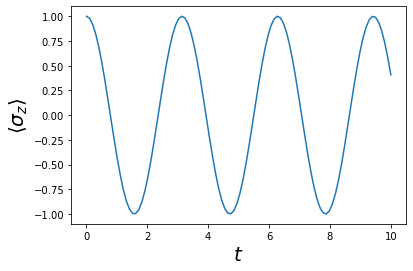

In [52]:
fig, axes = plt.subplots(1,1)

axes.plot(tlist, expect(sigmaz(), result.states))

axes.set_xlabel(r'$t$', fontsize=20)
axes.set_ylabel(r'$\left<\sigma_z\right>$', fontsize=20);

If we are only interested in expectation values, we could pass a list of operators to the `mesolve` function that we want expectation values for, and have the solver compute then and store the results in the `Odedata` class instance that it returns.

For example, to request that the solver calculates the expectation values for the operators $\sigma_x, \sigma_y, \sigma_z$:

In [53]:
result = mesolve(H, psi0, tlist, [], [sigmax(), sigmay(), sigmaz()])

Now the expectation values are available in `result.expect[0]`, `result.expect[1]`, and `result.expect[2]`:

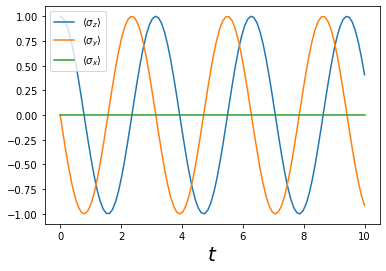

In [54]:
fig, axes = plt.subplots(1,1)

axes.plot(tlist, result.expect[2], label=r'$\left<\sigma_z\right>$')
axes.plot(tlist, result.expect[1], label=r'$\left<\sigma_y\right>$')
axes.plot(tlist, result.expect[0], label=r'$\left<\sigma_x\right>$')

axes.set_xlabel(r'$t$', fontsize=20)
axes.legend(loc=2);

## Dissipative dynamics

To add dissipation to a problem, all we need to do is to define a list of collapse operators to the call to the `mesolve` solver.

A collapse operator is an operator that describes how the system is interacting with its environment. 

For example, consider a quantum harmonic oscillator with Hamiltonian 

$H = \hbar\omega a^\dagger a$

and which loses photons to its environment with a relaxation rate $\kappa$. The collapse operator that describes this process is 

$\sqrt{\kappa} a$

since $a$ is the photon annihilation operator of the oscillator. 

To program this problem in QuTiP:

In [56]:
w = 1.0               # oscillator frequency
kappa = 0.1           # relaxation rate
a = destroy(10)       # oscillator annihilation operator
rho0 = fock_dm(10, 5) # initial state, fock state with 5 photons
H = w * a.dag() * a   # Hamiltonian

# A list of collapse operators
c_ops = [np.sqrt(kappa) * a]

In [57]:
tlist = np.linspace(0, 50, 100)

# request that the solver return the expectation value of the photon number state operator a.dag() * a
result = mesolve(H, rho0, tlist, c_ops, [a.dag() * a]) 

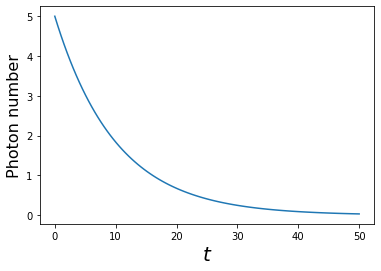

In [58]:
fig, axes = plt.subplots(1,1)
axes.plot(tlist, result.expect[0])
axes.set_xlabel(r'$t$', fontsize=20)
axes.set_ylabel(r"Photon number", fontsize=16);

### Software versions

In [60]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.6.2
Numpy,1.21.2
SciPy,1.7.3
matplotlib,3.5.0
Cython,0.29.25
Number of CPUs,8
BLAS Info,INTEL MKL
IPython,7.29.0
Python,"3.9.7 (default, Sep 16 2021, 08:50:36) [Clang 10.0.0 ]"
OS,posix [darwin]
